In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import io
import requests


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
#import all the necessary liabriries requried if needed with insert more 

In [2]:
df = pd.read_csv(r'C:\Users\SOOQ ELASER\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.shape
#it contain 1470 rows and 35 columns

(1470, 35)

In [4]:
df.isnull().sum()
#no null value present in the data set

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.info()
#We have 9 obejct columns and 26 numeric columns
#We have some categorical but mostly mostly numerical datatype of features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.columns
#here are all the columns name in datset

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.describe().T
#education showing in the numneic value
#In above stats information, there are mix of features pure numeric in nature and some are categorical feature.
#a few columns like Age, Daily rates are almost normally distributed
#Distance from home is left skewed. Monthly rate is right skewed.
#Among all Numeric Variables 'Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' are ordinal variable. Unique range of all these ordinal Variable need to check.
#Minimum Empolyee Age is 18 and Maximum age of employee 60.
#50% of Employees has worked atleast 2 companies previously.
#Average distance from home is 9.1 KM
#StandardHours and EmployeeCount contain same value for all stastical parameter. It means they contain one unique value.

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:
df.describe(include=np.object).T
# description of the categorcal features
# target class NO which means no attrition count is high as compared to Yes
#maximum people are working in R&D department.All are over18

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


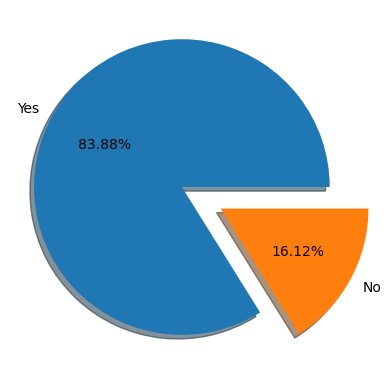

In [9]:
labels = 'Yes', 'No'
fig,ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels=labels,autopct = '%2.2f%%',explode=[0.1,0.2], shadow=True)
plt.show()
#83.88% 1237 Employees did not leave the organization while 16.12% 237  did leave the organization making our dataset to be considered imbalanced since more people stay in the organization than they actually leave.

In [10]:
df.groupby("Attrition")[["Age","DailyRate","DistanceFromHome","HourlyRate","MonthlyIncome","MonthlyRate","PercentSalaryHike","TrainingTimesLastYear","TotalWorkingYears","YearsWithCurrManager"]].mean()
#Peole who left or attrited, their average age is less than people who didnt not attrite. 
#we see differene in their daily rates also. 
#attrited people were getting less rate as compared to other.
#People who attrited,their average working year was also good.
#we see huge diffeent in montly income, they average income low as compared to not attrited, difference may be observed because of new hiring.

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TrainingTimesLastYear,TotalWorkingYears,YearsWithCurrManager
Attrition,,,,,,,,,,
No,37.561233,812.504461,8.915653,65.952149,6832.739659,14265.779400,15.231144,2.832928,11.862936,4.367397
Yes,33.607595,750.362869,10.632911,65.573840,4787.092827,14559.308017,15.097046,2.624473,8.244726,2.852321


In [11]:
# Inspect useless features
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [12]:
# Drop useless features  
df.drop(labels = ['Over18','StandardHours','EmployeeCount'],axis = 1 ,inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


Text(0.5, 1.0, 'BusinessTravel wise attrition')

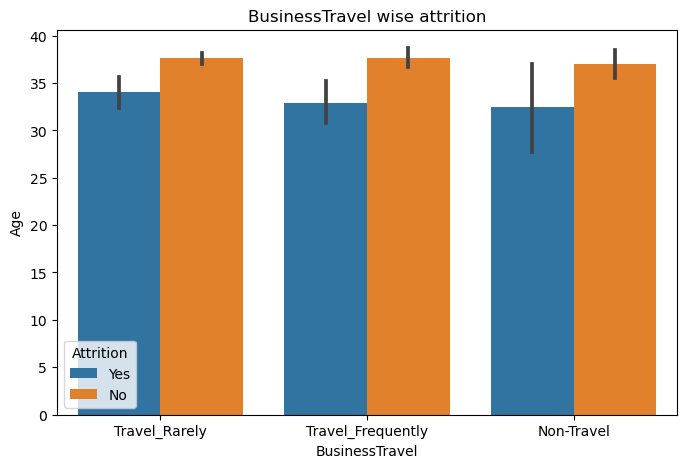

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x="BusinessTravel", y = "Age", data = df,hue = "Attrition")
plt.title("BusinessTravel wise attrition")
#There is no impact of travelling on attrition

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<AxesSubplot:ylabel='Department,Attrition'>

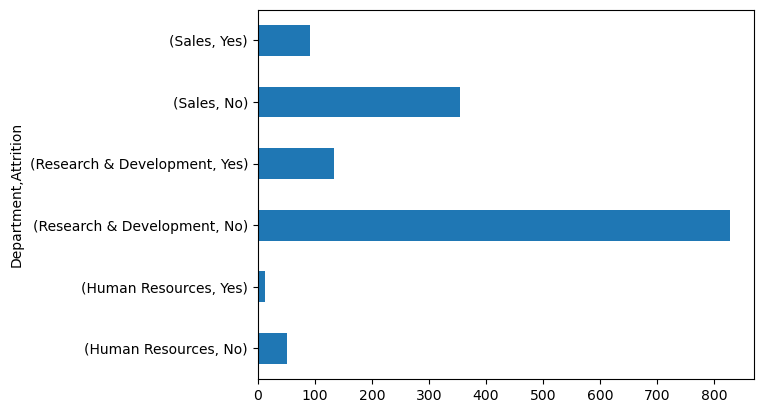

In [14]:
print(df["Department"].value_counts())
df.groupby(["Department","Attrition"])["Attrition"].count().plot(kind = "barh")
#R&D department frequency is more in the data thus we see more number of attrition in R&D department. lets check the departmment wise stats

<AxesSubplot:xlabel='Attrition,EducationField'>

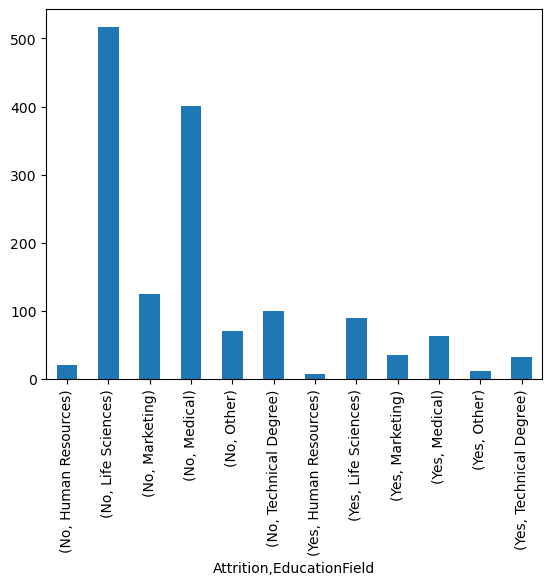

In [15]:
df.groupby(["Attrition","EducationField"])["Attrition"].count().plot(kind = "bar")
#high attrition observed in life science and medical department

In [16]:
# Changing object types to categories
cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Attrition']
for col in cols:
    df[col] = df[col].astype('category')
    

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EmployeeNumber            1470 non-null   int64   
 9   EnvironmentSatisfaction   1470 non-null   int64   
 10  Gender                    1470 non-null   category
 11  HourlyRate                1470 non-null   int64   
 12  JobInvolvement            1470 non-null   int64   
 13  JobLevel                  1470 non-null   int64 

In [18]:
df[cols].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
Attrition         2
dtype: int64

In [19]:
for col in cols:
    display(df[col].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64

No     1233
Yes     237
Name: Attrition, dtype: int64

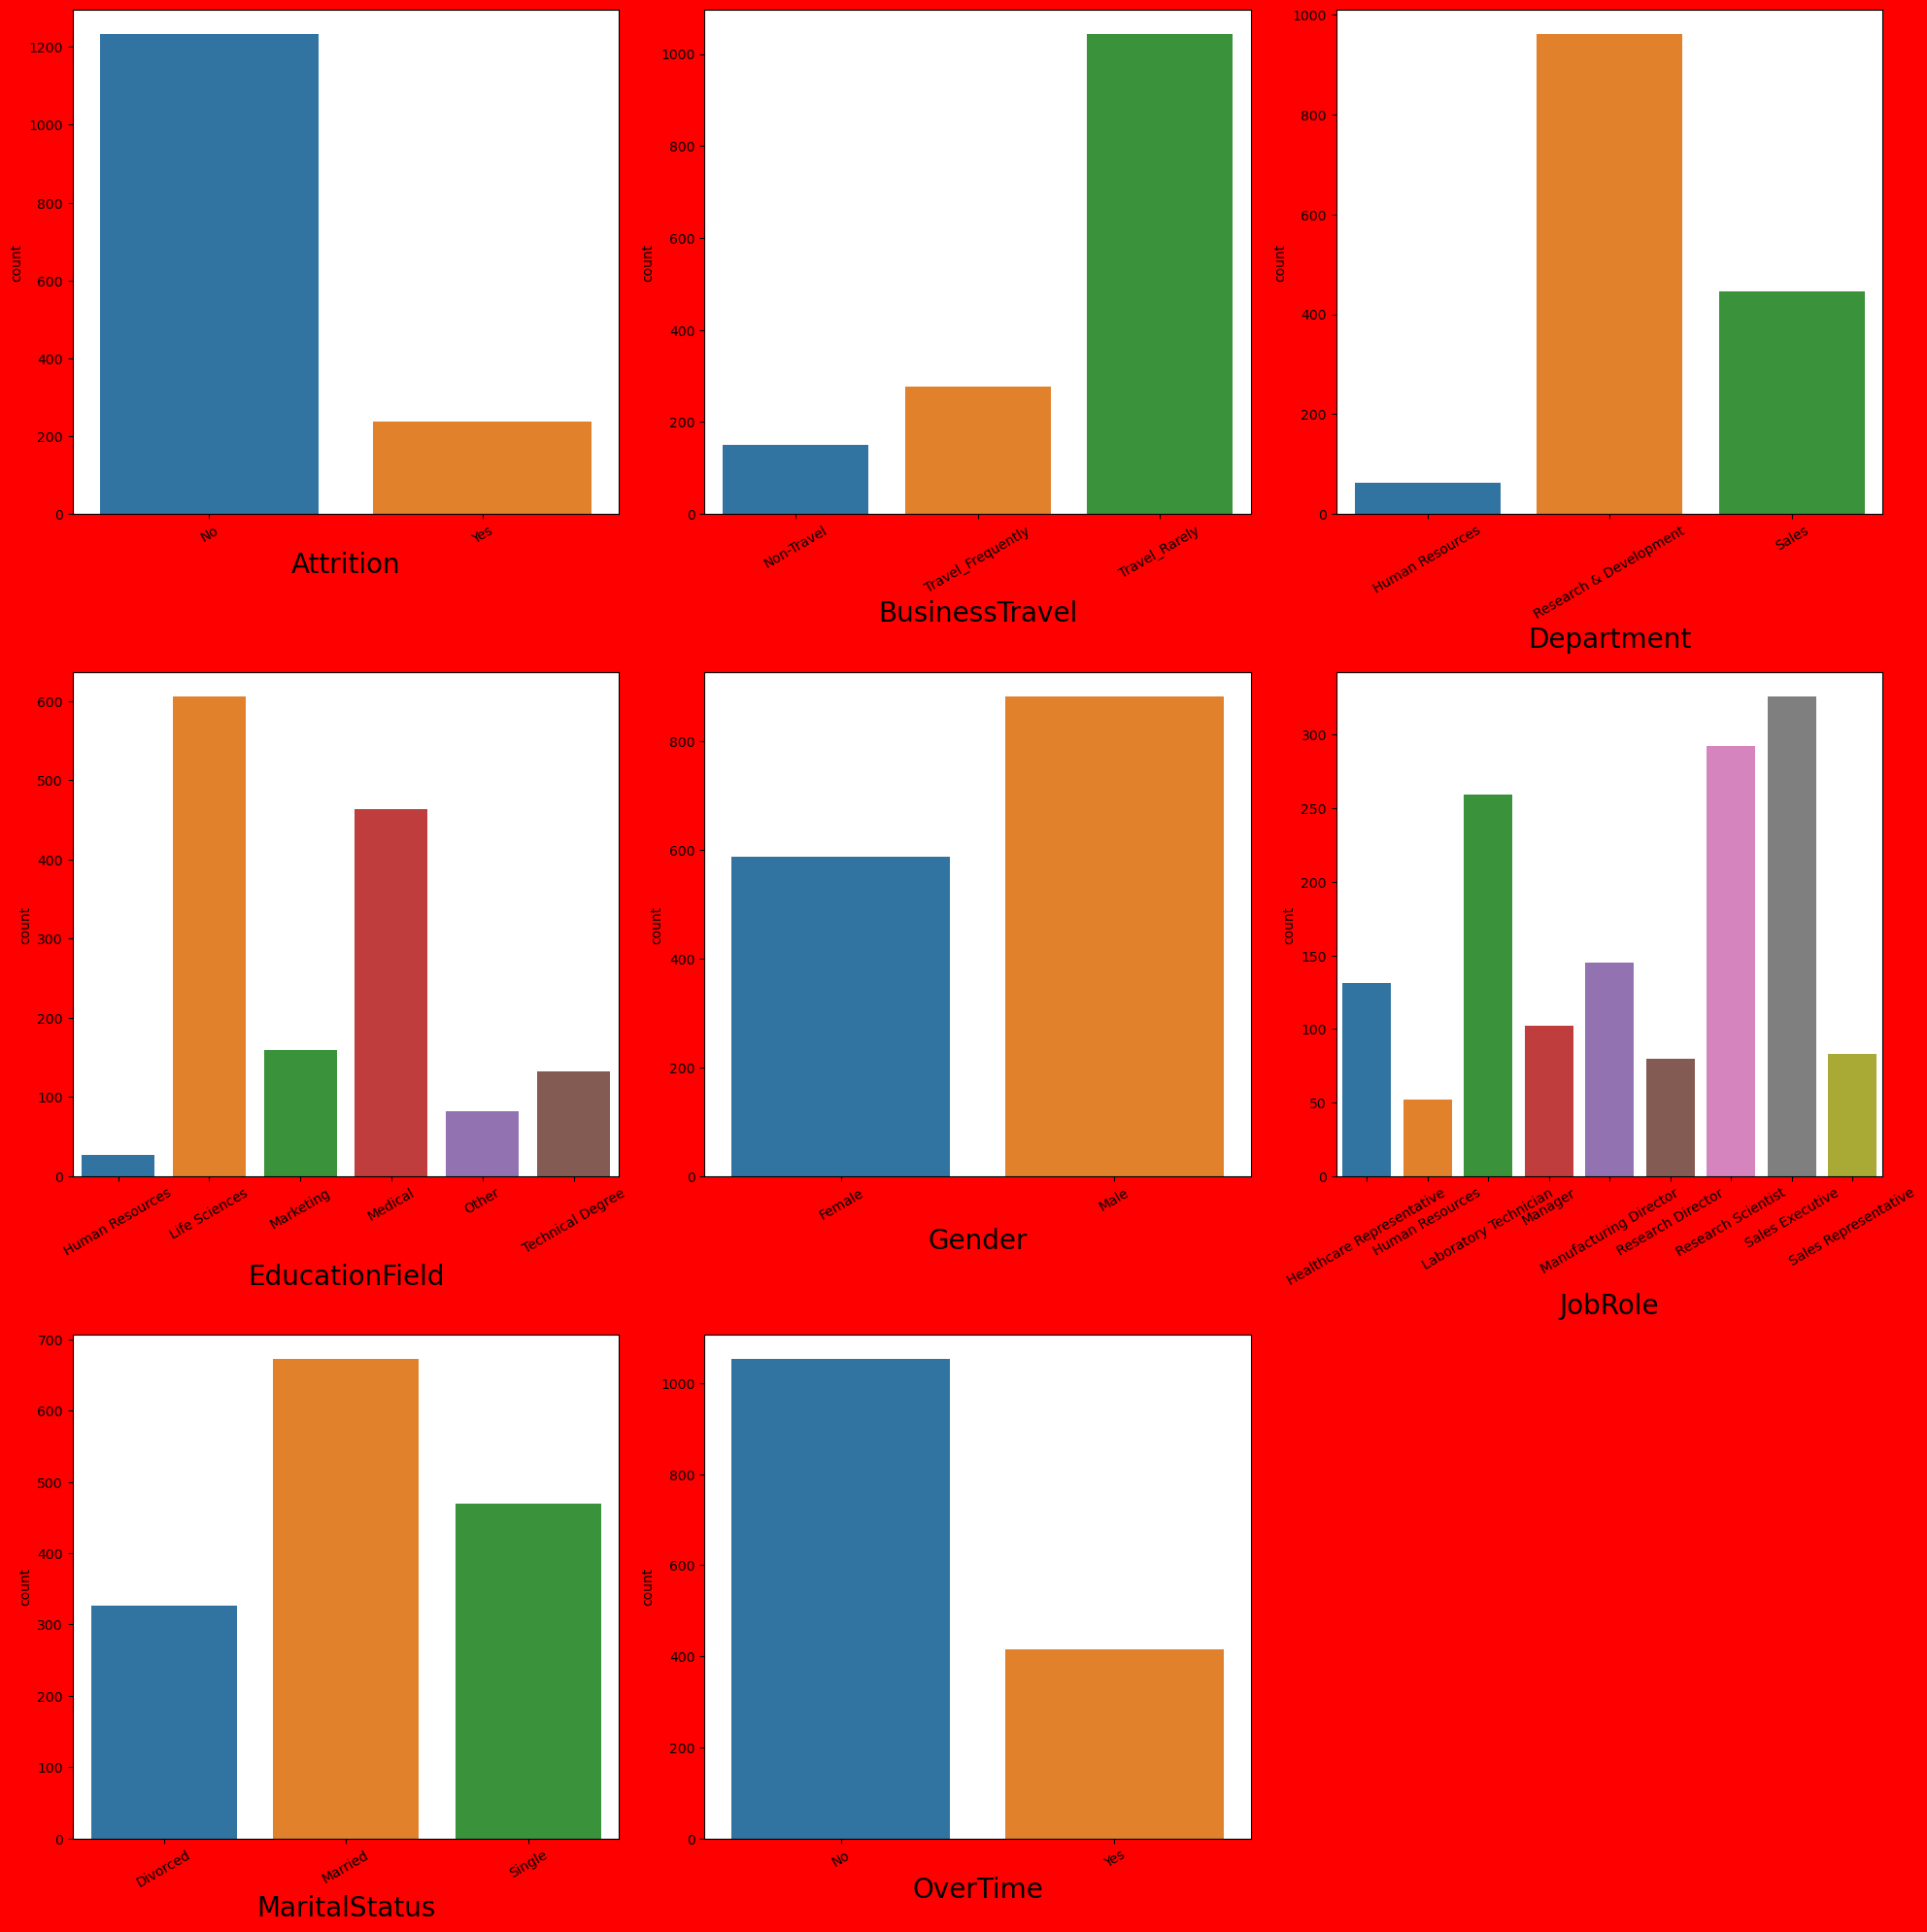

In [20]:
plt.figure(figsize=(20,20), facecolor='red')
plotnumber =1
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'OverTime' ]
for i in Category:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [21]:
# Changing object types to categories
ordial = ['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction','RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]

for col in ordial:
    df[col] = df[col]

In [22]:
df[ordial].nunique()

Education                   5
EnvironmentSatisfaction     4
JobInvolvement              4
JobSatisfaction             4
RelationshipSatisfaction    4
PerformanceRating           2
WorkLifeBalance             4
dtype: int64

In [23]:
for col in ordial:
    display(df[col].value_counts())

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

3    1244
4     226
Name: PerformanceRating, dtype: int64

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

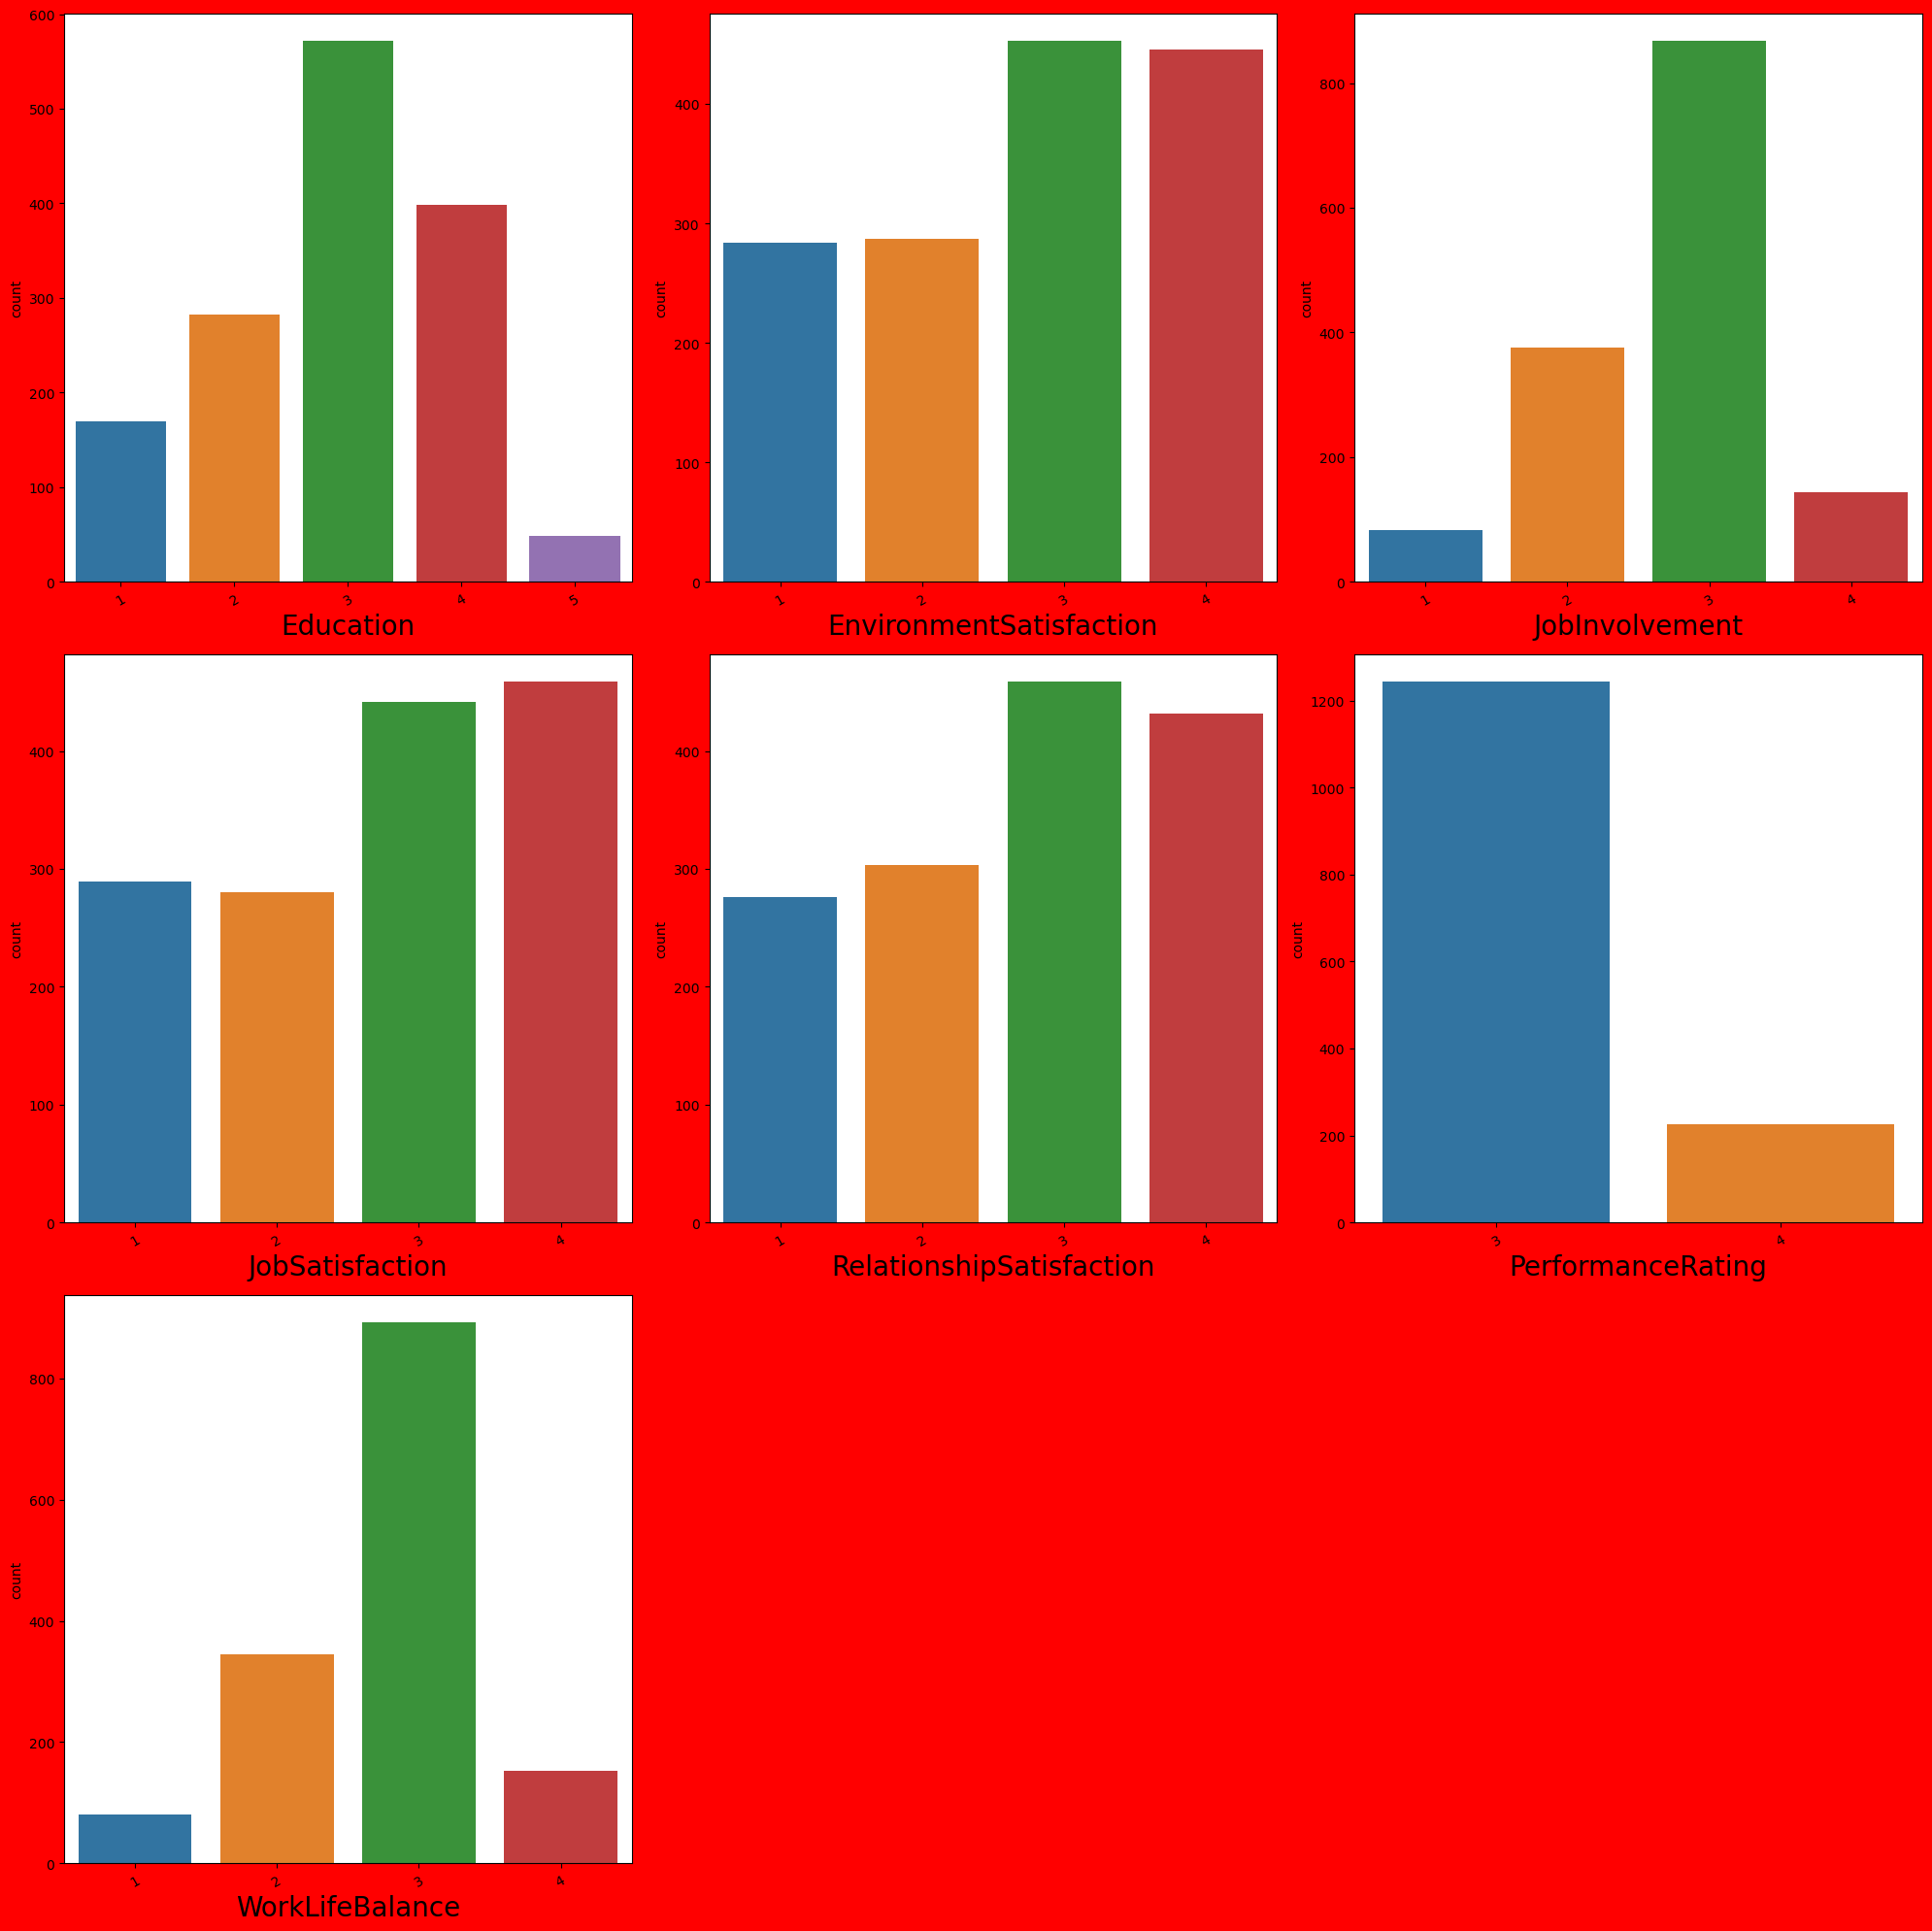

In [24]:
plt.figure(figsize=(20,20), facecolor='red')
plotnumber =1
ordial = ['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction','RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]

for i in ordial:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

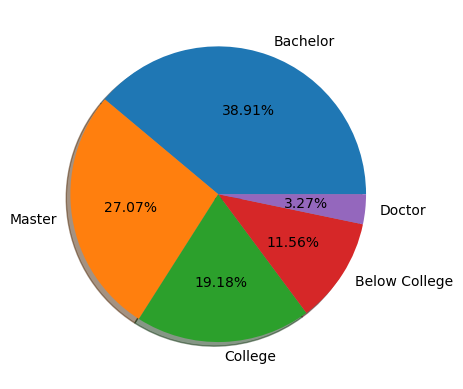

In [25]:

fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(),labels =['Bachelor','Master','College','Below College','Doctor'],autopct = '%3.2f%%', shadow=True)
plt.show()
#38.91% % of Employees are bachelor.
#Almost 19% Employees are educated upto college & 12% are below college.
#30 % of Employees are highly educated which involves master and doctor degree.
#More than 60 % employees educated at Masters & Bachelor. It interesting to find out in which department need this human resources.

In [26]:

df['Department'].value_counts()
#hightest is R&D

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

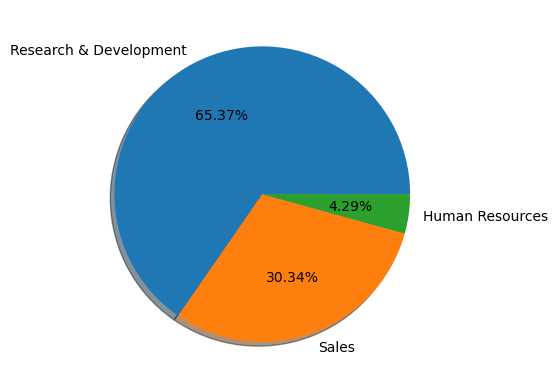

In [27]:

fig,ax= plt.subplots()
ax.pie(df['Department'].value_counts(),labels=['Research & Development','Sales','Human Resources'],autopct= '%3.2f%%',shadow=True)
plt.show()
#same showing in percentage also 

In [28]:
pd.crosstab([df.Education],[df.Department],margins=True)
#Only 63 Employee work in HR department.
# Out of Total 961 Employee no of employee educated at Bachelors,Masters, Doctor are 379,255 and 30 respectively.

Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


In [29]:
pd.crosstab([df.Education],[df.Department,df.Attrition],margins=True)
#attrition as per department

Department Human Resources     Research & Development      Sales       All
Attrition               No Yes                     No  Yes    No Yes      
Education                                                                 
1                        4   1                     96   19    39  11   170
2                       10   3                    159   23    69  18   282
3                       23   4                    323   56   127  39   572
4                       12   3                    223   32   105  23   398
5                        2   1                     27    3    14   1    48
All                     51  12                    828  133   354  92  1470

In [30]:
# Relation Satisfaction Level
df.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [31]:

# Stockoptionlevel
df.StockOptionLevel.value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

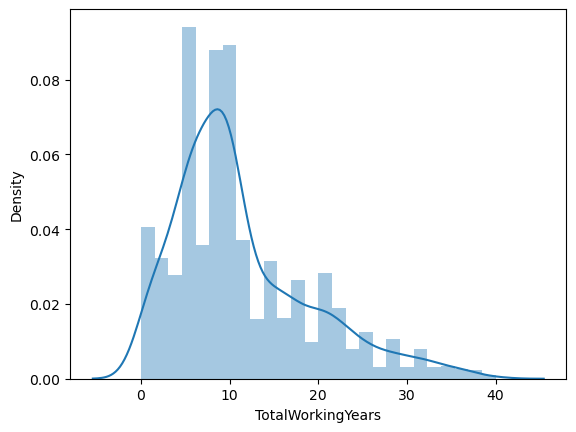

In [32]:

sns.distplot(df.TotalWorkingYears)
#*the total working years features has a slightly positive skewed distribution

In [33]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

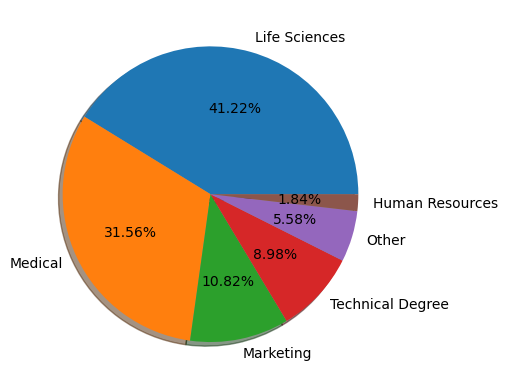

In [34]:

fig,ax= plt.subplots()
ax.pie(df['EducationField'].value_counts(),labels =['Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'],autopct= '%3.2f%%',shadow=True)
plt.show()
#41.22%  of EducationField is  life sceince
#31.56 %  of EducationField is  medical
# 10.82% of  EducationField is  marketing
#rest percentage followed by other , hr & TD

In [35]:
# Let check distribution of education Vs education Field
pd.crosstab([df.Education],[df.EducationField],margins=True)

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
1,2,67,14,63,5,19,170
2,2,116,24,99,19,22,282
3,16,233,59,183,24,57,572
4,5,173,52,104,33,31,398
5,2,17,10,15,1,3,48
All,27,606,159,464,82,132,1470


In [36]:
# Let check distribution of department  Vs education Field
pd.crosstab([df.Department],[df.EducationField],margins=True)
#Half of empolyee dont have HR background 
#Most of Employees with Techanical degree are Bachelors.
#Most of Employees having Masters and Doctors belong to Life Science and Medical domain.
#There are 159 Employee with Marketing background and all work in Sales Department.
#50% Employees in sales department have background of Life sciences & Medical. 

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


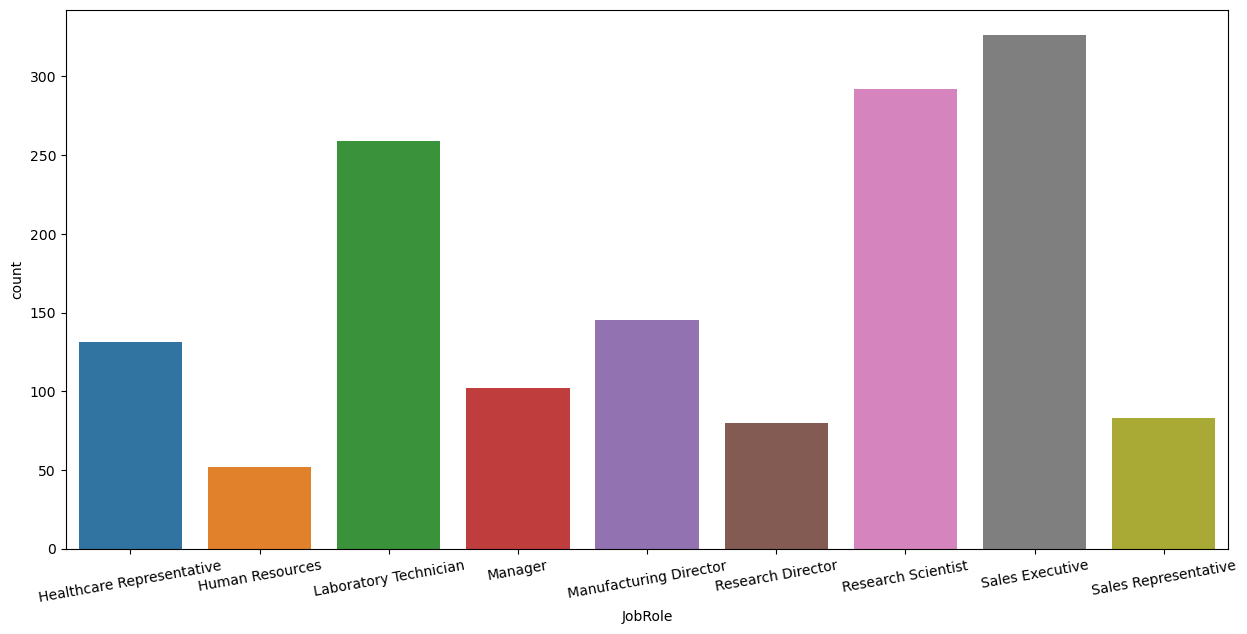

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(df['JobRole'])
plt.xticks(rotation=10)
plt.show()

In [38]:
#first build matrix of department vs job role which will give us idea about number of employees of different job role across department
pd.crosstab([df.JobRole],[df.Department],margins=True)
#There are 3 job role in HR Department
#maximum of which are sales Executive with 446 Total Employees.
#There 6 different Job role in R&D department 

Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


In [39]:
pd.crosstab([df.JobRole],[df.Attrition],margins=True)
#hihest attrition is LT followed by SE & RS

Attrition,No,Yes,All
JobRole,,,
Healthcare Representative,122,9,131
Human Resources,40,12,52
Laboratory Technician,197,62,259
Manager,97,5,102
Manufacturing Director,135,10,145
Research Director,78,2,80
Research Scientist,245,47,292
Sales Executive,269,57,326
Sales Representative,50,33,83


In [40]:
pd.crosstab([df.JobRole,df.Department],[df.Attrition],margins=True)
#At the Top chart 62 Laboratory Technician has resign from job, followed by 57 sales executive and 47 Research Scientist.

Attrition                                           No  Yes   All
JobRole                   Department                             
Healthcare Representative Research & Development   122    9   131
Human Resources           Human Resources           40   12    52
Laboratory Technician     Research & Development   197   62   259
Manager                   Human Resources           11    0    11
                          Research & Development    51    3    54
                          Sales                     35    2    37
Manufacturing Director    Research & Development   135   10   145
Research Director         Research & Development    78    2    80
Research Scientist        Research & Development   245   47   292
Sales Executive           Sales                    269   57   326
Sales Representative      Sales                     50   33    83
All                                               1233  237  1470

<AxesSubplot:xlabel='Age', ylabel='count'>

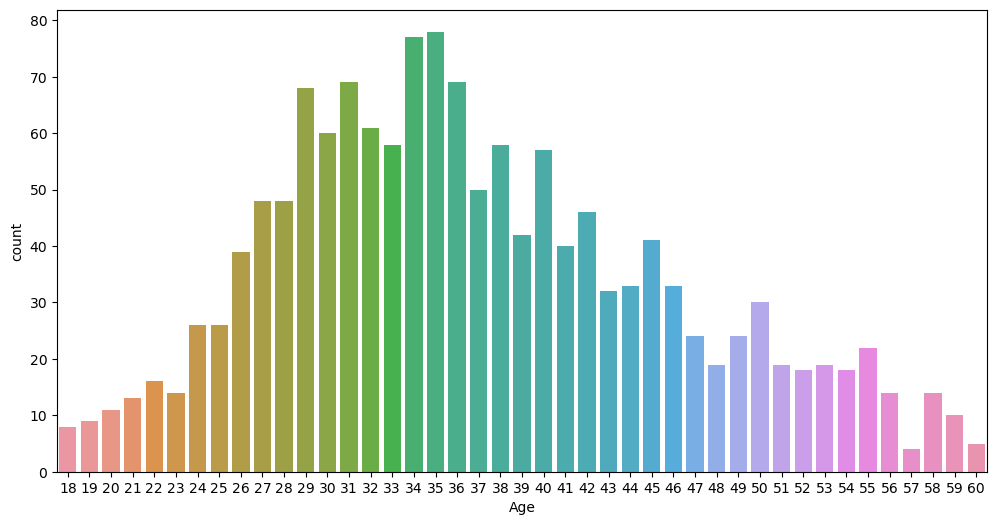

In [41]:
plt.subplots(figsize=(12,6))
sns.countplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

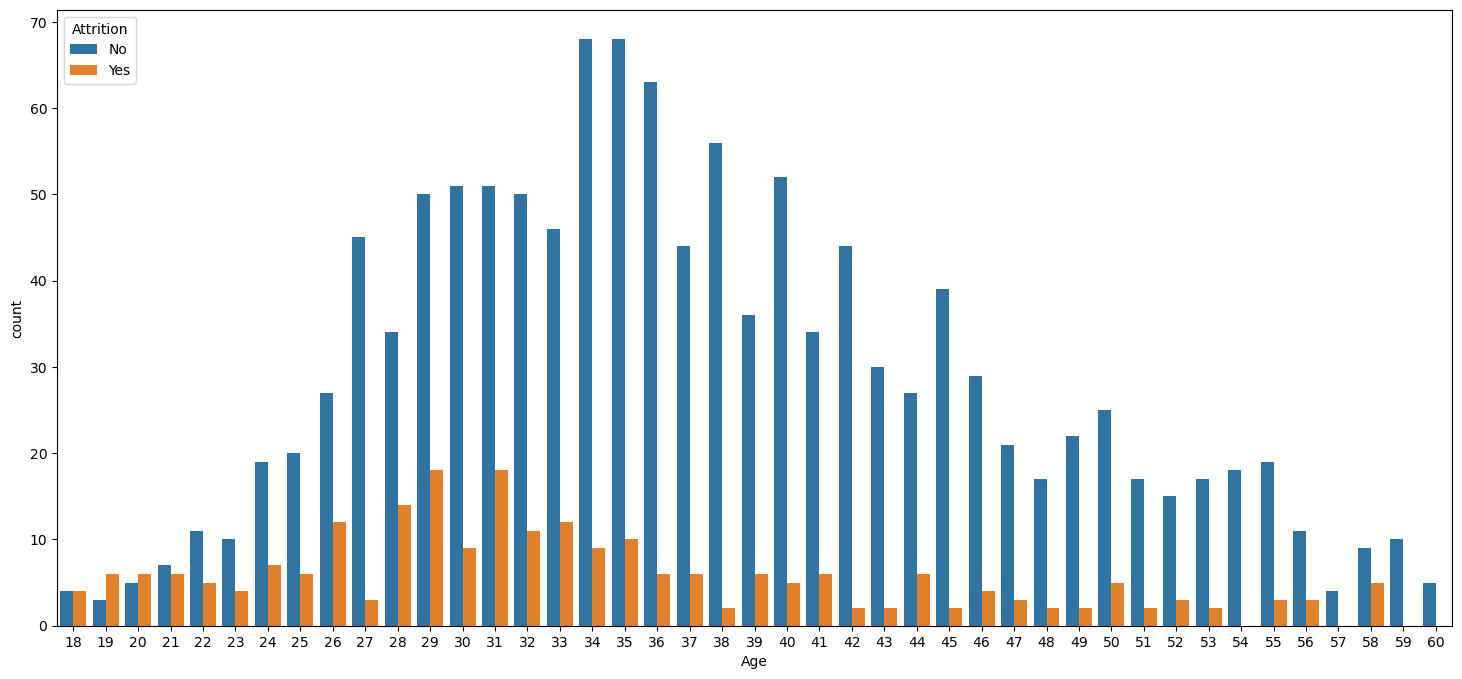

In [42]:
plt.subplots(figsize=(18,8))
sns.countplot(x='Age', hue='Attrition', data=df)
#The Attrition rate is minimum between the Age years of 34 and 35.
#he Attrition rate is maximum between the Age years of 29 and 31.

<AxesSubplot:xlabel='Education', ylabel='MonthlyIncome'>

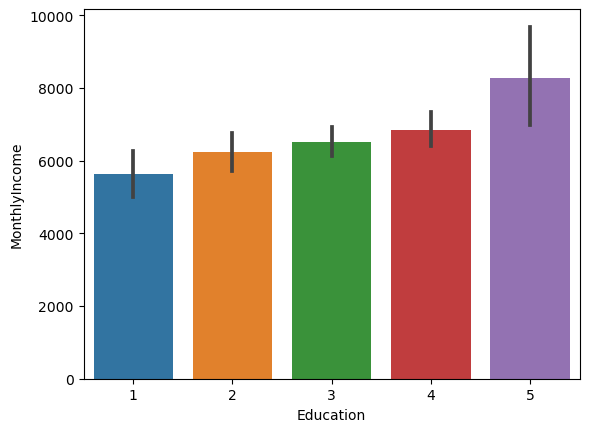

In [43]:
# Education vs monthly income
sns.barplot(df.Education,df.MonthlyIncome)

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

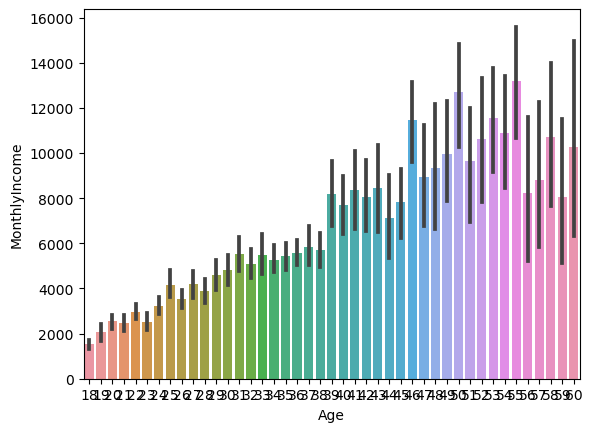

In [44]:
# Age vs monthly income
sns.barplot(df.Age,df.MonthlyIncome)

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

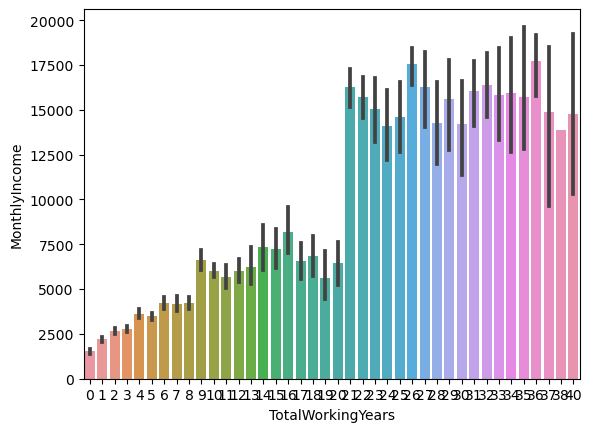

In [45]:
# TotalWorkingYears vs monthly income
sns.barplot(df.TotalWorkingYears,df.MonthlyIncome)
#Monthly Income is highest for the employees with 21 or more number of Total Working Years

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

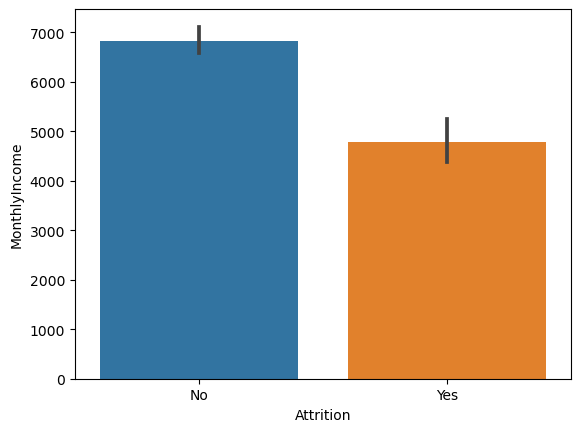

In [46]:
#Attrition vs  MonthlyIncome
sns.barplot(df.Attrition,df.MonthlyIncome)
#The Attrition rate in the employees is less when the monthly income reaches to 6900.

<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

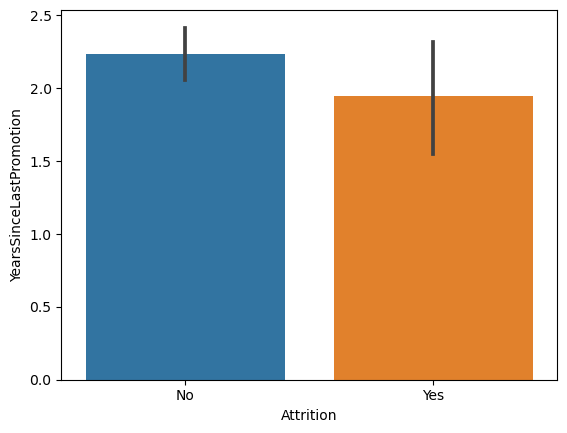

In [47]:
#Attrition vs YearsSinceLastPromotion
sns.barplot(df.Attrition,df.YearsSinceLastPromotion)
#The rate of Attrition is high when the employee did not got promoted since 1.8 years.

In [48]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [49]:
# Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder
Or_e = OrdinalEncoder()
def datachange(df,column):
    df[column]=Or_e.fit_transform(df[column])
    return df

In [50]:
rows = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df=datachange(df, rows)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,7,1,...,3,4,1,6,3,3,2,2,2,2


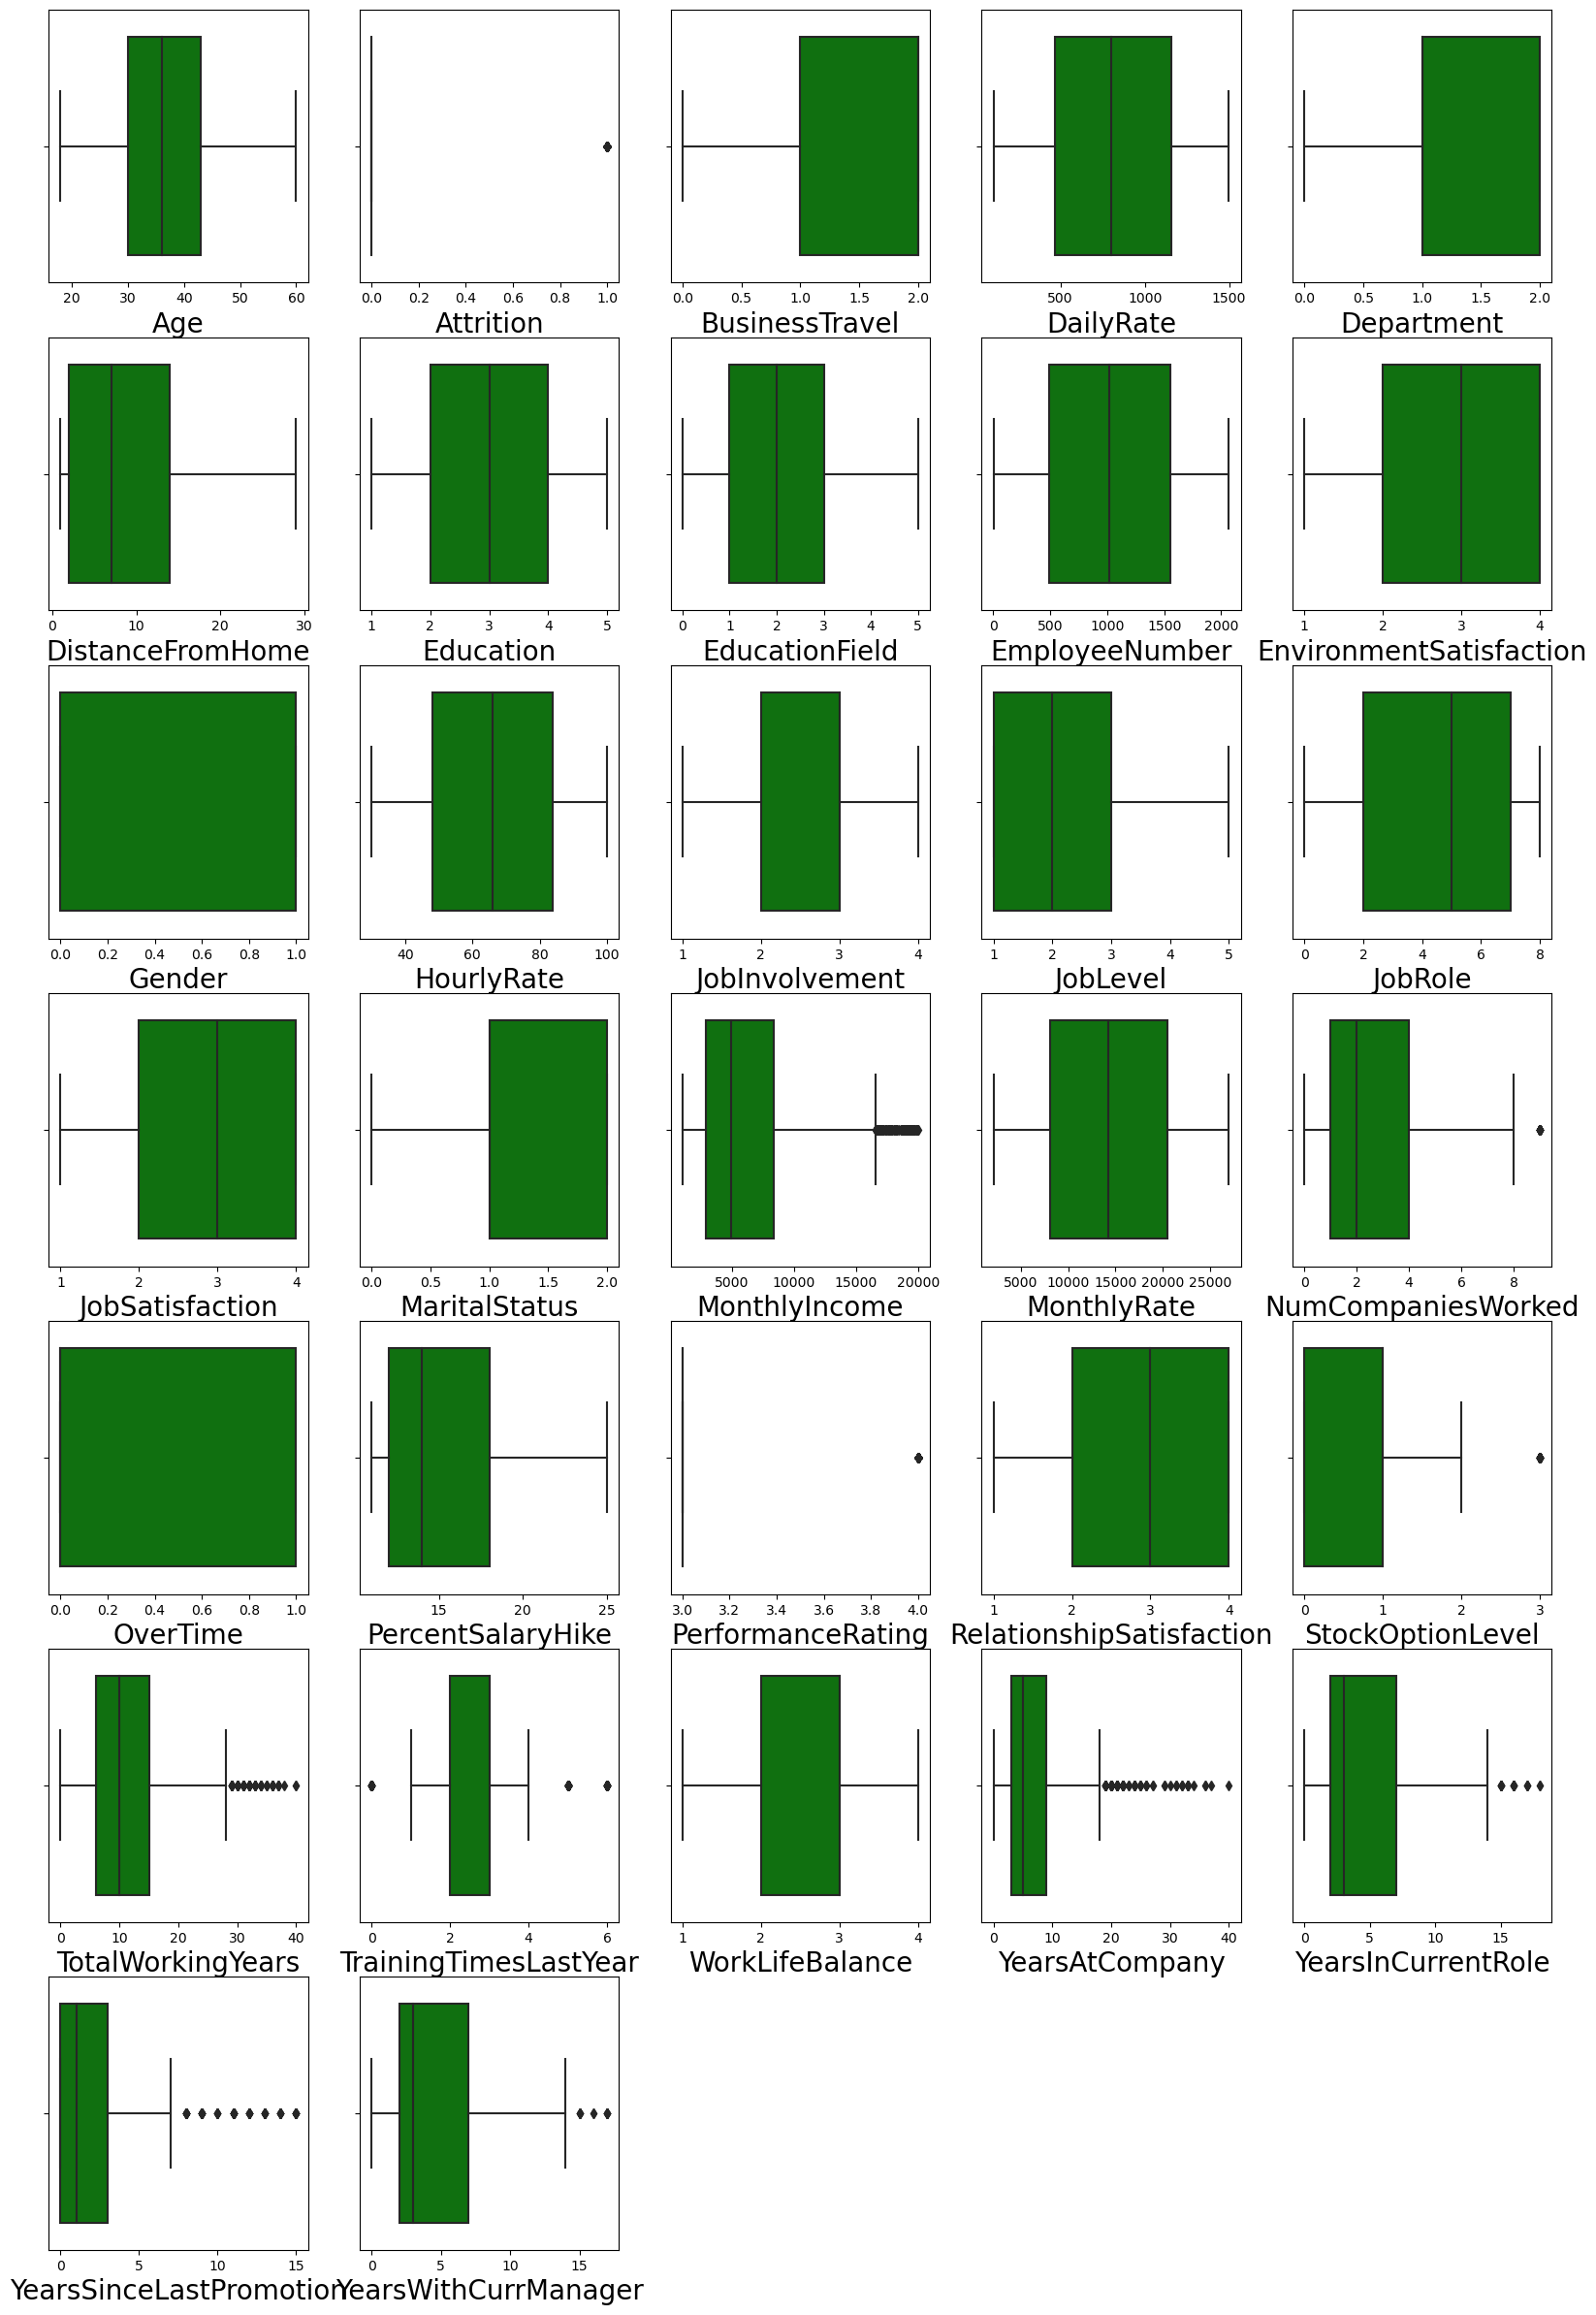

In [51]:
plt.figure(figsize=(20,30))
plotnumber=1

for column in df:
    if plotnumber<=32:
        ax=plt.subplot(7,5,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#Features containing outliers
#"MonthlyIncome", "NumCompaniesWorked", "PerformanceRating", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "Attrition".

In [52]:
# Z score method for removing outlier the acceptable range is  +/-0.5 value of skewness.
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df1=df[(z<3).all(axis=1)]
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1.0,884,1.0,23,2,3.0,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2.0,613,1.0,6,1,3.0,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2.0,155,1.0,4,3,1.0,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1.0,1023,2.0,2,3,3.0,2065,4,...,3,4,0,17,3,2,9,6,0,8


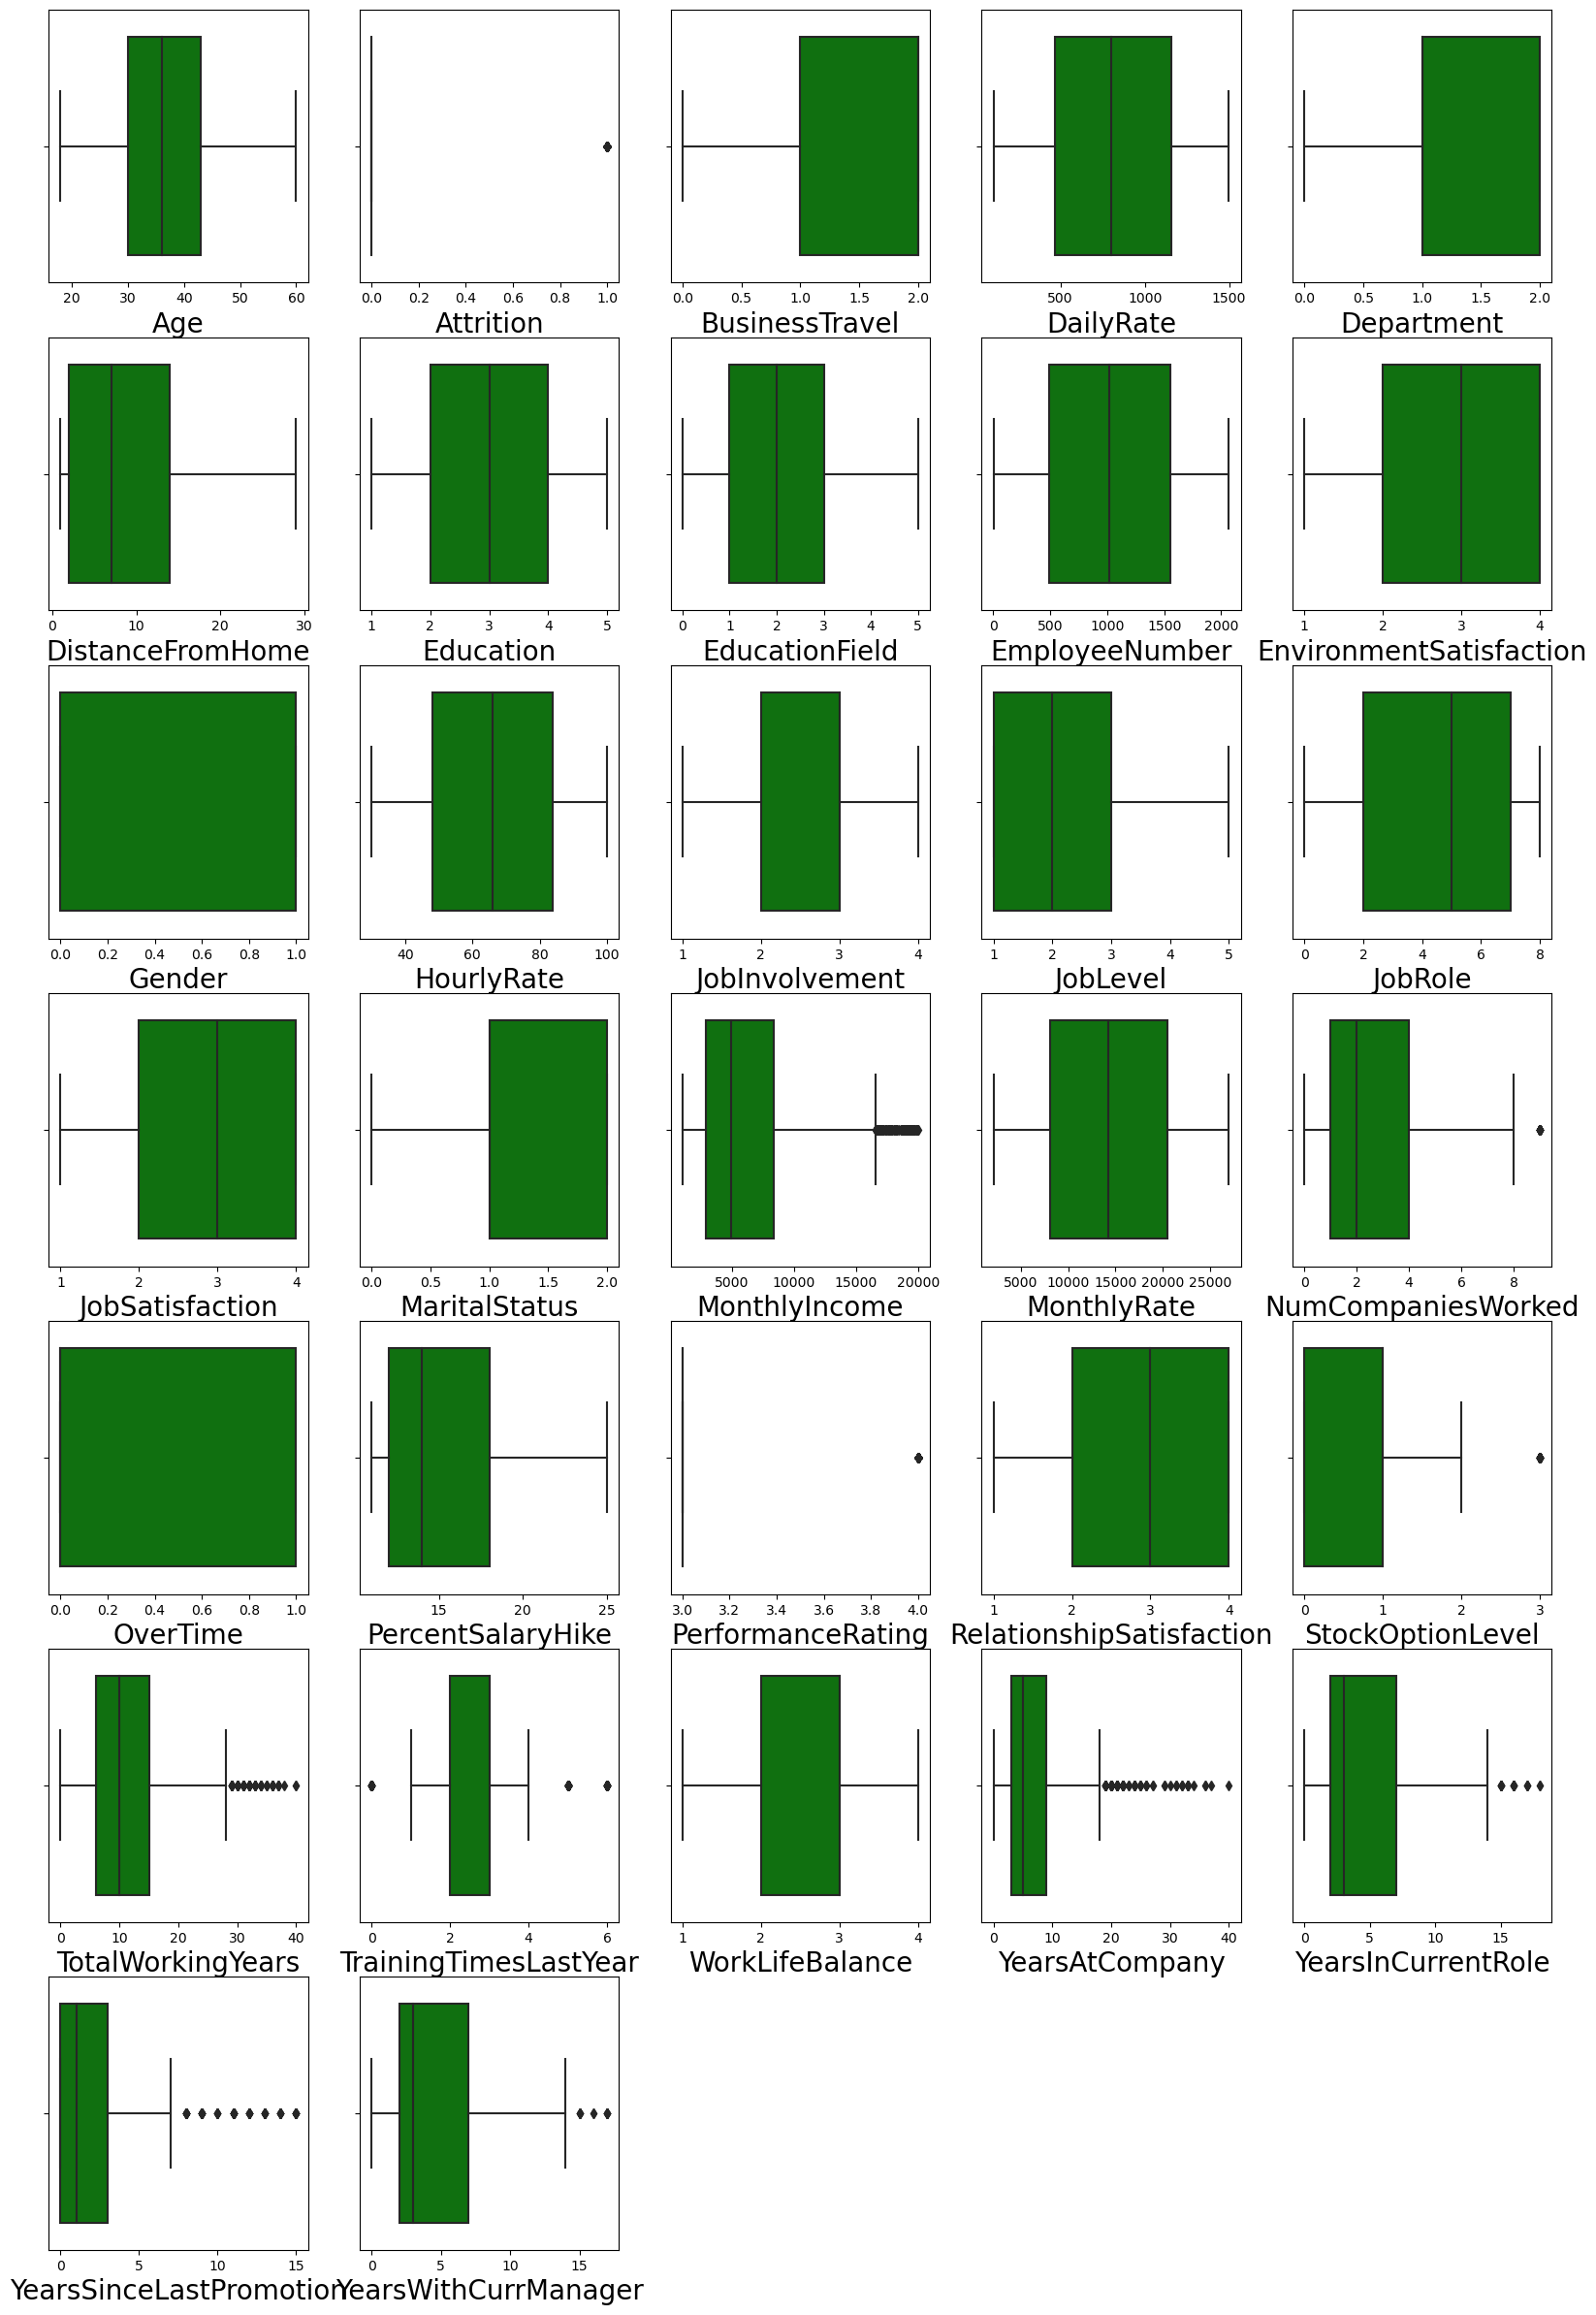

In [53]:
plt.figure(figsize=(20,30))
plotnumber=1

for column in df1:
    if plotnumber<=32:
        ax=plt.subplot(7,5,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [54]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)

Shape of the dataframe before removing outliers:  (1470, 32)
Shape of the dataframe after removing outliers:  (1387, 32)


In [55]:
df1 = df
#reassing to df

In [56]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1.0,884,1.0,23,2,3.0,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2.0,613,1.0,6,1,3.0,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2.0,155,1.0,4,3,1.0,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1.0,1023,2.0,2,3,3.0,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [57]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

In [58]:
#swill split the data in feature and lable then will treat the skewness
x = df.drop('Attrition',axis = 1)
y = df['Attrition']

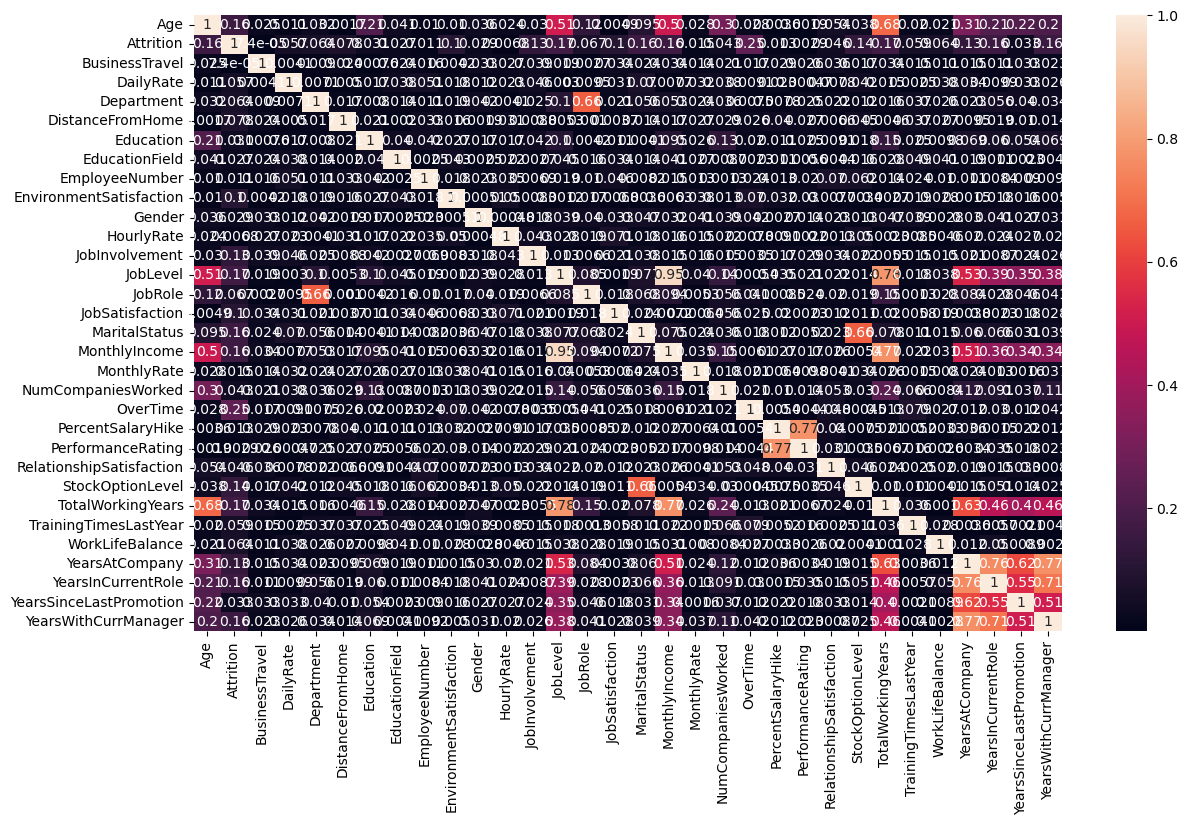

In [59]:

df_corr = df.corr().abs()

plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True)
plt.show()
#

In [60]:
# We will drop other fuel as result of poor correlation and lot of missing values

In [61]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


In [62]:
#Age, JobLevel is highly positively correlated with TotalWorkingYears.
#JobLevel is highly positively correlated with the MonthlyIncome.
#PercentSalaryHike is highly positively correlated with the column PerformanceRating.

In [63]:
from sklearn.preprocessing import power_transform
df = power_transform(x)
df = pd.DataFrame(df, columns=x.columns)
df.skew()
#For Numeric features skewness is transform within permissible limit.
#for ordinal features & categorical features skew parameter irrevalent.

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EmployeeNumber             -0.288025
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
Y

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,2.103317,Age
1,1.012649,BusinessTravel
2,1.024090,DailyRate
3,2.027102,Department
4,1.012839,DistanceFromHome
5,1.069849,Education
6,1.027279,EducationField
7,1.024754,EmployeeNumber
8,1.020216,EnvironmentSatisfaction
9,1.020726,Gender


In [65]:
# implementing oversampling for handling imbalance data
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x,y )
#categories present in our target label have the same value.

In [66]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [67]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

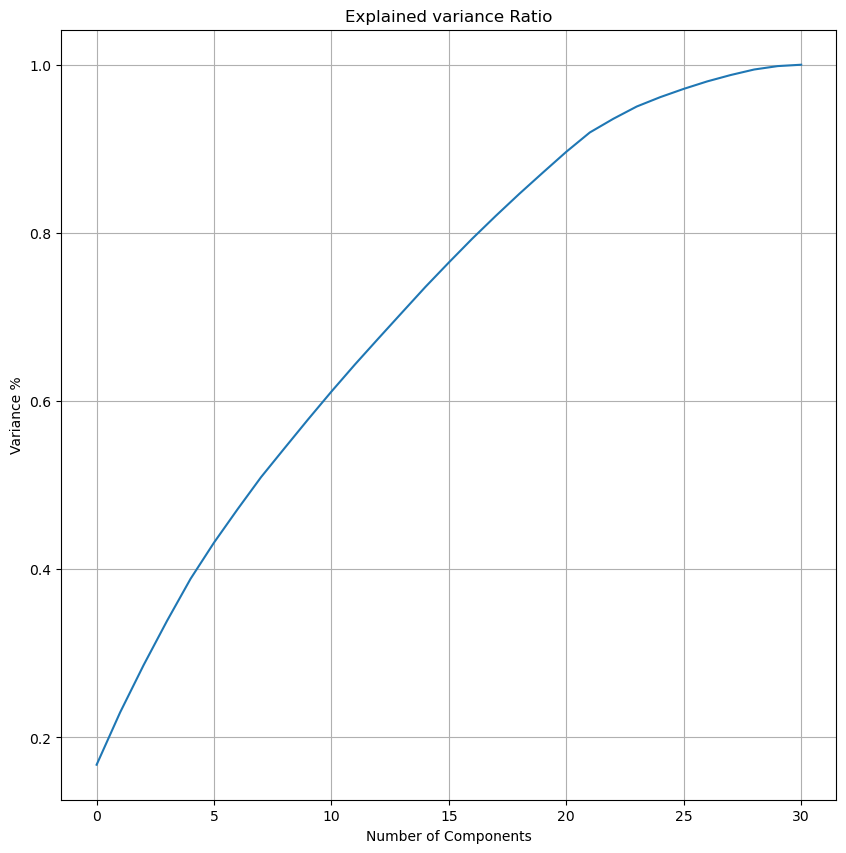

In [68]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_) )
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()
#AS per the graph, we can see that 21 principal components attribute for 90% of variation in the data. We shall pick the first 21 components for our prediction



In [69]:
pca_new = PCA(n_components=21)
x_new = pca_new.fit_transform(x_scale)
#21 feature taken

In [70]:

x_new=pd.DataFrame(x_new,columns=np.arange(21))

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge,LassoCV , RidgeCV,Lasso 

from xgboost import XGBRegressor    
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score
#all the necassary liabraries that required for building a model

In [72]:
#train test split , splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=12)

In [73]:
# defined a funcution 
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        
        print('============trainresult===============')
        
        print(f'accuracy_score{accuracy_score(y_train,y_pred) *  100:.2f}%' )
        
    elif train == False:
        
        pred = clf.predict(x_test)
        
        print('============testresult===============')
        
        print(f'accuracy_score {accuracy_score(y_test,pred)* 100:.2f}%')
        
        print(classification_report(y_test,pred,digits = 2))

In [74]:
##creating an object of logistic regression model
log = LogisticRegression()

log.fit(x_train,y_train)
y_pred = log.predict_proba(x_test)
y_pred

array([[0.01794913, 0.98205087],
       [0.31445684, 0.68554316],
       [0.57004338, 0.42995662],
       [0.34502971, 0.65497029],
       [0.07769321, 0.92230679],
       [0.71421821, 0.28578179],
       [0.34276361, 0.65723639],
       [0.93360061, 0.06639939],
       [0.12272407, 0.87727593],
       [0.98777088, 0.01222912],
       [0.98827469, 0.01172531],
       [0.03362321, 0.96637679],
       [0.07547569, 0.92452431],
       [0.97753492, 0.02246508],
       [0.0458437 , 0.9541563 ],
       [0.70417811, 0.29582189],
       [0.91857673, 0.08142327],
       [0.54527318, 0.45472682],
       [0.73559158, 0.26440842],
       [0.04833668, 0.95166332],
       [0.1338087 , 0.8661913 ],
       [0.98285997, 0.01714003],
       [0.44196726, 0.55803274],
       [0.03355816, 0.96644184],
       [0.16266251, 0.83733749],
       [0.14950045, 0.85049955],
       [0.82037428, 0.17962572],
       [0.9149694 , 0.0850306 ],
       [0.77071496, 0.22928504],
       [0.02291284, 0.97708716],
       [0.

In [75]:
metric_score(log,x_train,x_test,y_train,y_test,train = True)
metric_score(log,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score83.42%
============testresult===============
accuracy_score 83.00%
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       244
           1       0.83      0.83      0.83       250

    accuracy                           0.83       494
   macro avg       0.83      0.83      0.83       494
weighted avg       0.83      0.83      0.83       494



In [76]:
cv_score = (cross_val_score(log, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check 

Cross Validation Score: 61.19305910274203


In [77]:
#DecisionTreeClassifier model
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)


DecisionTreeClassifier()

In [78]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score100.00%
============testresult===============
accuracy_score 81.98%
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       244
           1       0.82      0.82      0.82       250

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494



In [79]:
cv_score = (cross_val_score(clf, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check 

Cross Validation Score: 73.03783331006561


In [80]:
#hyper parameter tunning 
grid_params = {'criterion':['gini','entropy'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=clf,
                   param_grid = grid_params,
                   cv = 5)


In [81]:
#time to train the data for best paraam and get best out of it
grid.fit(x_train,y_train)
best = grid.best_params_
best

{'criterion': 'gini',
 'max_depth': 12,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [82]:
d_t = DecisionTreeClassifier(criterion= 'gini', max_depth= 12,max_leaf_nodes=5 ,min_samples_leaf= 4,min_samples_split=3)
d_t.fit(x_train,y_train)
#best params and traning data

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=5, min_samples_leaf=4,
                       min_samples_split=3)

In [83]:
metric_score(d_t,x_train,x_test,y_train,y_test,train = True)
metric_score(d_t,x_train,x_test,y_train,y_test,train = False)
#afterbest params result got better DecisionTreeClassifier

============trainresult===============
accuracy_score77.79%
============testresult===============
accuracy_score 75.51%
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       244
           1       0.78      0.72      0.75       250

    accuracy                           0.76       494
   macro avg       0.76      0.76      0.75       494
weighted avg       0.76      0.76      0.75       494



In [84]:
#RandomForestClassifier model
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predict = RFC.predict(x_test)
predict

#Created the Random Forest Classifier Model and checked for it's evaluation metrics.

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,

In [85]:
metric_score(RFC,x_train,x_test,y_train,y_test,train = True)
metric_score(RFC,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score100.00%
============testresult===============
accuracy_score 88.06%
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       244
           1       0.89      0.87      0.88       250

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494



In [86]:
cv_score = (cross_val_score(RFC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 84.67713987731068


In [87]:
#hyper parameter tunning 
grid_params = {'criterion':['gini','entropy'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=clf,
                   param_grid = grid_params,
                   cv = 5)

In [88]:
#time to train the data for best paraam and get best out of it
grid.fit(x_train,y_train)
best = grid.best_params_
best

{'criterion': 'gini',
 'max_depth': 12,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [89]:
RF = RandomForestClassifier(criterion= 'gini', max_depth= 12,max_leaf_nodes=9 ,min_samples_leaf= 4,min_samples_split=3)
RF.fit(x_train,y_train)
#best params and traning data

RandomForestClassifier(max_depth=12, max_leaf_nodes=9, min_samples_leaf=4,
                       min_samples_split=3)

In [104]:
metric_score(RF,x_train,x_test,y_train,y_test,train = True)
metric_score(RF,x_train,x_test,y_train,y_test,train = False)
#afterbest params result got better RandomForestClassifier

============trainresult===============
accuracy_score84.99%
============testresult===============
accuracy_score 81.78%
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       244
           1       0.84      0.79      0.81       250

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494



In [90]:
# KNeighborsClassifier model
KNC = KNeighborsClassifier(n_neighbors=12)
KNC.fit(x_train,y_train)
y_pred = log.predict_proba(x_test)
y_pred
#Created the K Neighbors Classifier Model and checked for it's evaluation metrics.
# tried with many numbers n_neighbors but getting best accurancy with !% hence done ith that

array([[0.01794913, 0.98205087],
       [0.31445684, 0.68554316],
       [0.57004338, 0.42995662],
       [0.34502971, 0.65497029],
       [0.07769321, 0.92230679],
       [0.71421821, 0.28578179],
       [0.34276361, 0.65723639],
       [0.93360061, 0.06639939],
       [0.12272407, 0.87727593],
       [0.98777088, 0.01222912],
       [0.98827469, 0.01172531],
       [0.03362321, 0.96637679],
       [0.07547569, 0.92452431],
       [0.97753492, 0.02246508],
       [0.0458437 , 0.9541563 ],
       [0.70417811, 0.29582189],
       [0.91857673, 0.08142327],
       [0.54527318, 0.45472682],
       [0.73559158, 0.26440842],
       [0.04833668, 0.95166332],
       [0.1338087 , 0.8661913 ],
       [0.98285997, 0.01714003],
       [0.44196726, 0.55803274],
       [0.03355816, 0.96644184],
       [0.16266251, 0.83733749],
       [0.14950045, 0.85049955],
       [0.82037428, 0.17962572],
       [0.9149694 , 0.0850306 ],
       [0.77071496, 0.22928504],
       [0.02291284, 0.97708716],
       [0.

In [91]:
metric_score(KNC,x_train,x_test,y_train,y_test,train = True)
metric_score(KNC,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score86.97%
============testresult===============
accuracy_score 83.20%
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       244
           1       0.77      0.95      0.85       250

    accuracy                           0.83       494
   macro avg       0.85      0.83      0.83       494
weighted avg       0.85      0.83      0.83       494



In [92]:
cv_score = (cross_val_score(KNC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 70.2362631496826


In [93]:
#hyper parameter traning
param = {'algorithm': ['kd_tree','brute'],
        'leaf_size':[3,4,5,6,7,9],
        'n_neighbors' : [2,3,4,5,6,7]
        }
grid = GridSearchCV(estimator = KNC,param_grid=param)
grid.fit(x_train,y_train)
grid.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 2}

In [94]:
#best tuning
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size=3, n_neighbors= 2)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=2)

In [95]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

metric_score(knn,x_train,x_test,y_train,y_test,train=True)

============testresult===============
accuracy_score 89.68%
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       244
           1       0.84      0.99      0.91       250

    accuracy                           0.90       494
   macro avg       0.91      0.90      0.90       494
weighted avg       0.91      0.90      0.90       494

============trainresult===============
accuracy_score99.95%


In [96]:
# GradientBoostingClassifier model
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict_proba(x_test)
y_pred

array([[0.02008517, 0.97991483],
       [0.13316422, 0.86683578],
       [0.66957038, 0.33042962],
       [0.24802435, 0.75197565],
       [0.04361345, 0.95638655],
       [0.49196706, 0.50803294],
       [0.20656165, 0.79343835],
       [0.92021483, 0.07978517],
       [0.04701334, 0.95298666],
       [0.94771903, 0.05228097],
       [0.91102521, 0.08897479],
       [0.12063819, 0.87936181],
       [0.11842984, 0.88157016],
       [0.95549637, 0.04450363],
       [0.04270606, 0.95729394],
       [0.62098892, 0.37901108],
       [0.93516402, 0.06483598],
       [0.25452428, 0.74547572],
       [0.92813891, 0.07186109],
       [0.04826876, 0.95173124],
       [0.25622279, 0.74377721],
       [0.97691207, 0.02308793],
       [0.28541694, 0.71458306],
       [0.0281164 , 0.9718836 ],
       [0.10703394, 0.89296606],
       [0.04994373, 0.95005627],
       [0.87125491, 0.12874509],
       [0.87654289, 0.12345711],
       [0.83667488, 0.16332512],
       [0.10276768, 0.89723232],
       [0.

In [97]:
metric_score(GBC,x_train,x_test,y_train,y_test,train = True)
metric_score(GBC,x_train,x_test,y_train,y_test,train = False)
##Created the GradientBoostingClassifi

============trainresult===============
accuracy_score95.59%
============testresult===============
accuracy_score 84.41%
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       244
           1       0.84      0.85      0.85       250

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494



In [98]:
cv_score = (cross_val_score(GBC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 71.2135894424781


In [99]:
from sklearn.svm import SVC
# Support Vector Machines
svmMod = SVC()
svmMod.fit(x_train,y_train)
y_pred = svmMod.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,

In [100]:
metric_score(svmMod,x_train,x_test,y_train,y_test,train = True)
metric_score(svmMod,x_train,x_test,y_train,y_test,train = False)
#SVC with function 

============trainresult===============
accuracy_score95.28%
============testresult===============
accuracy_score 90.28%
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       244
           1       0.90      0.90      0.90       250

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



In [101]:
# BaggingClassifier model
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
y_pred = BC.predict_proba(x_test)
y_pred

array([[0. , 1. ],
       [0.1, 0.9],
       [0.7, 0.3],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0.1, 0.9],
       [0.8, 0.2],
       [0. , 1. ],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.1, 0.9],
       [0. , 1. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.7, 0.3],
       [0.8, 0.2],
       [0. , 1. ],
       [0.9, 0.1],
       [1. , 0. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.2, 0.8],
       [0. , 1. ],
       [0.8, 0.2],
       [0.3, 0.7],
       [0.1, 0.9],
       [0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       [0.3, 0.7],
       [0.1, 0.9],
       [0.1, 0.9],
       [0. , 1. ],
       [0.3, 0.7],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.3, 0.7],
       [0. , 1. ],
       [0.5, 0.5],
       [0.9,

In [102]:
metric_score(BC,x_train,x_test,y_train,y_test,train = True)
metric_score(BC,x_train,x_test,y_train,y_test,train = False)
##Created the BaggingClassifier

============trainresult===============
accuracy_score99.29%
============testresult===============
accuracy_score 84.21%
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       244
           1       0.86      0.83      0.84       250

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494



In [103]:
cv_score = (cross_val_score(BC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 77.94869057493162


In [ ]:


#final model we have selected which is  RandomForestClassifier because after hyperpara tuning it giving best results in term of prediction data 